In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='./data/drinks.csv'
drinks=pd.read_csv(file_path)
print(drinks.info())
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
#맥주와 와인의 상관계수 찾기
coor=drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(coor)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [9]:
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


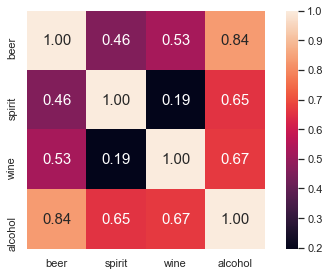

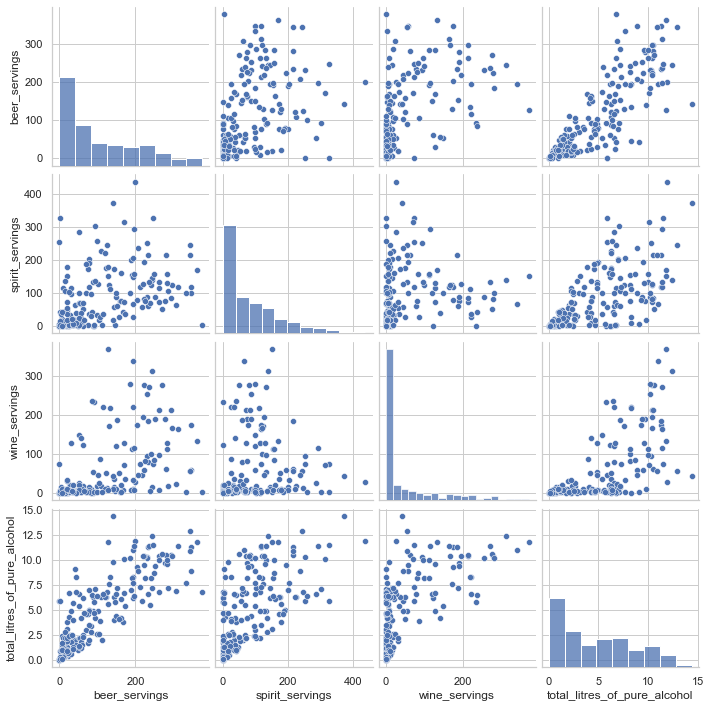

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#히트맵 시각화
cols_view=['beer','spirit','wine','alcohol']
sns.set(font_scale=1.0)
hm=sns.heatmap(corr.values,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols_view,xticklabels=cols_view)
plt.tight_layout()
plt.show()
#산점도 그래프
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']],height=2.5)
plt.show()

In [17]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [18]:
drinks['continent']=drinks['continent'].fillna('OT')

In [19]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


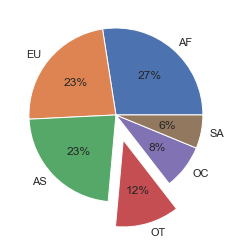

In [26]:
labels=drinks['continent'].value_counts().index.tolist()
fracs1=drinks['continent'].value_counts().values.tolist()
explode=(0,0,0,0.3,0,0)
plt.pie(fracs1,explode=explode,labels=labels,autopct='%.0F%%',shadow=False)
plt.show()

In [35]:
result=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
print(result)

                 mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812
SA         114.750000   25  302  1377


In [39]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean>=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [46]:
beer_continent=drinks.groupby('continent')['beer_servings'].mean().idxmax()
print(beer_continent)

EU


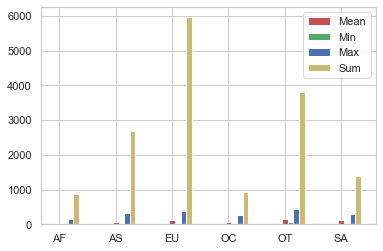

In [64]:
n_groups=len(result.index)
means=result['mean'].tolist()
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

index=np.arange(n_groups)
bar_width=0.1
rects1=plt.bar(index,means,bar_width,bottom=True,color='r',label='Mean')
rects2=plt.bar(index+bar_width,mins,bar_width,color='g',label='Min')
rects3=plt.bar(index+bar_width*2,maxs,bar_width,color='b',label='Max')
rects4=plt.bar(index+bar_width*3,sums,bar_width,color='y',label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()

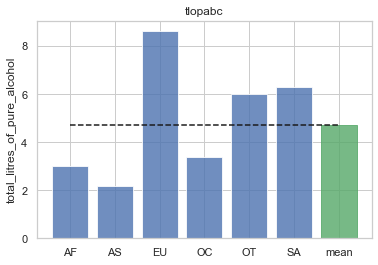

In [82]:
continents=continent_mean.index.tolist()
continents.append('mean')
x_pos=np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x_pos,alcohol,align='center',alpha=0.8)
bar_list[len(continents)-1].set_color('g')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos,continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('tlopabc')
plt.show()

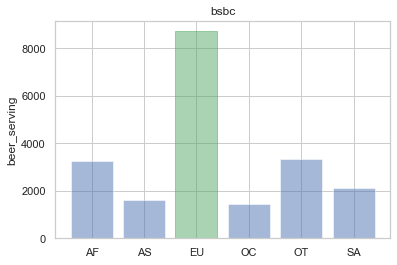

In [83]:
beer_group=drinks.groupby('continent')['beer_servings'].sum()
continents=beer_group.index.tolist()
y_pos=np.arange(len(continents))
alcohol=beer_group.tolist()
bar_list=plt.bar(y_pos,alcohol,align='center',alpha=0.5)
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos,continents)
plt.ylabel('beer_serving')
plt.title('bsbc')
plt.show()

In [86]:
africa=drinks.loc[drinks['continent']=='AF']
europe=drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult=stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffeVar=stats.ttest_ind(africa['beer_servings'],europe['beer_servings'],equal_var=False)
print(tTestResult)
print(tTestResultDiffeVar)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


In [111]:
africa

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [89]:
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)

In [92]:
country_with_rank=drinks[['country','alcohol_rate']]
country_with_rank=country_with_rank.sort_values(by='alcohol_rate',ascending=0)
country_with_rank.head(10)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


In [96]:
country_list=country_with_rank.country
x_pos=np.arange(len(country_list))
rank=country_with_rank.alcohol_rate

TypeError: 'Int64Index' object is not callable

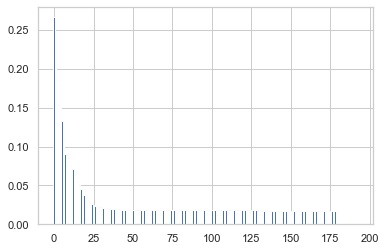

In [98]:
bar_list=plt.bar(x_pos,rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel("alcohol rate")
plt.title('dtd')
plt.axis([0,200,0,0.3])

korea_rank=country_list.index("South Korea")
korea_alc_rate=country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea:'+str(korea_rank+1),xy=(korea_rank,korea_alc_rate),xytext=(korea_rank+10,korea_alc_rate+0.05),arrowprops=dict(facecolor='red',shrink=0.05))

In [99]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [100]:
wine_mean=drinks.groupby('continent')['wine_servings'].mean()

In [102]:
drinks['total_servings']=drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']

In [107]:
total_servings=drinks.groupby('country')['wine_servings'].sum()

In [109]:
total_mean=drinks['total_servings'].mean()

In [110]:
total_mean

236.60621761658032

In [112]:
less_country=drinks.loc[drinks['total_servings']<total_mean]

In [119]:
max_spirit=less_country.loc[less_country['spirit_servings'].max()].country

TypeError: 'max_spirit' is an invalid keyword argument for print()

In [121]:
max_spirit

'Uganda'

In [122]:
drinks['alcohol_rate']=drinks['total_servings']/drinks['total_litres_of_pure_alcohol']

In [126]:
drinks['alcohols_rate']=drinks['alcohol_rate'].fillna(0)

In [127]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate,alcohols_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN,0.000000
1,Albania,89,132,54,4.9,EU,275,56.122449,56.122449
2,Algeria,25,0,14,0.7,AF,39,55.714286,55.714286
3,Andorra,245,138,312,12.4,EU,695,56.048387,56.048387
4,Angola,217,57,45,5.9,AF,319,54.067797,54.067797
...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,56.623377,56.623377
189,Vietnam,111,2,1,2.0,AS,114,57.000000,57.000000
190,Yemen,6,0,0,0.1,AS,6,60.000000,60.000000
191,Zambia,32,19,4,2.5,AF,55,22.000000,22.000000


In [129]:
continents=drinks.groupby('continent')

In [133]:
continents_rate=(continents.spirit_servings.sum()+continents.wine_servings.sum()+continents.beer_servings.sum())/continents.total_litres_of_pure_alcohol.sum()

In [134]:
continents_rate

continent
AF    31.279799
AS    49.277487
EU    54.370810
OC    54.343808
OT    55.989848
SA    55.838838
dtype: float64